<a href="https://colab.research.google.com/github/dimpal-singh/-Web_Scraping_Job_Listings/blob/main/Web_Scraping_Job_Listings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Project Name: Web Scraping Data Science Job Listings**

##### **Project Type**    - EDA
##### **Contribution**    - Individual

## **Project Summary:**

 The primary goal is to develop an intelligent tool that streamlines data science job searches by utilizing web scraping on the Jobs website. Through the extraction of key details and the presentation of insights via visualizations, the tool aims to assist individuals in navigating the data science job market. It also keeps professionals, job seekers, and recruiters well-informed about industry trends.

**Web Scraping:** The project began with web scraping job listings from the TimesJobs website. The Python code utilized the BeautifulSoup library to extract relevant details from the job listings, including job title, company name, skills required, posting time, location, and salary. The scraping process involved iterating through multiple pages of job listings, refining the extraction process, and handling diverse data structures on the website.

**Data Cleaning and Transformation:** Following data extraction, the code applied techniques like strip() and replace() to organize the data systematically using the pandas library. Custom functions ensured a clean extraction of salary information, handling variations like 'Lacs,' and refining experience data for consistency.

**Visualization/EDA (Exploratory Data Analysis):**
Various visualizations were created to offer insights into different facets of the data science job market. The **WordCloud for In-Demand Skills** revealed Python, SQL, Machine Learning, and Data Mining as highly sought-after skills. **Top Cities with Most Job Openings** visualized job distribution across cities, highlighting Delhi with the highest number of openings. A **Comparison of Full-Time Jobs and Internships** indicated that 88.0% of opportunities are full-time positions, with the remaining 12.0% being internships. **Top Companies Providing Internship Opportunities** identified Maxgen Technologies as the leading provider. A **Comparison of Work from Home vs. On-Site Opportunities** showed 80.0% on-site and 20.0% work-from-home options. **Top Companies Providing Work from Home Options** showcased Minanshika Softech Solution Pvt Ltd and Soumya Gayen at the forefront. **Salary Distribution Analysis** depicted a concentration around 0-10 Lacs per annum, indicating entry-level pay scales, while **Experience Requirements Analysis** revealed a demand for beginners and 1-3 yrs experienced roles. The **Relationship Between Salary and Experience** visualized clusters, with 0-10 indicating entry-level and near 50 corresponding to higher packages for experienced professionals.

In summary, the project developed a valuable tool for comprehending data science job opportunities. By extracting data from the website and employing visualizations, it offered beneficial insights for professionals, job seekers, and recruiters in the dynamic field of data science. **It is important to note that these insights are derived from a snapshot of data and may evolve with real-time updates.**

 **GitHub Link:** https://github.com/dimpal-singh/-Web_Scraping_Job_Listings

## **Problem Statement: Navigating the Data Science Job Landscape**

🚀 Unleash your creativity in crafting a solution that taps into the heartbeat of the data science job market! Envision an ingenious project that seamlessly wields cutting-edge web scraping techniques and illuminating data analysis.

🔍 Your mission? To engineer a tool that effortlessly gathers job listings from a multitude of online sources, extracting pivotal nuggets such as job descriptions, qualifications, locations, and salaries.

🧩 However, the true puzzle lies in deciphering this trove of data. Can your solution discern patterns that spotlight the most coveted skills? Are there threads connecting job types to compensation packages? How might it predict shifts in industry demand?

🎯 The core **objectives** of this challenge are as follows:

1. Web Scraping Mastery: Forge an adaptable and potent web scraping mechanism. Your creation should adeptly harvest data science job postings from a diverse array of online platforms. Be ready to navigate evolving website structures and process hefty data loads.

2. Data Symphony: Skillfully distill vital insights from the harvested job listings. Extract and cleanse critical information like job titles, company names, descriptions, qualifications, salaries, locations, and deadlines. Think data refinement and organization.

3. Market Wizardry: Conjure up analytical tools that conjure meaningful revelations from the gathered data. Dive into the abyss of job demand trends, geographic distribution, salary variations tied to experience and location, favored qualifications, and emerging skill demands.

4. Visual Magic: Weave a tapestry of visualization magic. Design captivating charts, graphs, and visual representations that paint a crystal-clear picture of the analyzed data. Make these visuals the compass that guides users through job market intricacies.

🌐 While the web scraping universe is yours to explore, consider these platforms as potential stomping grounds:

* LinkedIn Jobs
* Indeed
* Naukri
* Glassdoor
* AngelList
* TimesJobs


🎈 Your solution should not only decode the data science job realm but also empower professionals, job seekers, and recruiters to harness the dynamic shifts of the industry. The path is open, the challenge beckons – are you ready to embark on this exciting journey?






##**Let's Begin !**

## ***1. Know Your Data***

### **Import Libraries**

In [23]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup
import requests
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')


###**Web Scraping Job Listings with BeautifulSoup and Pandas**


In [24]:
# Define the function to extract salary information
def extract_salary(job_element):
    # Extract salary information containing 'Lacs'
    salary_tags = job_element.find_all('li')
    for tag in salary_tags:
        if 'Lacs' in tag.text:
            return tag.text.strip().replace('₹Rs','').replace('Lacs p.a.','')
    return 'Not Provided'

def scrape_jobs(pages):
    all_data = []
    experience_required_list = []

    for page in range(1, pages + 1):
        # Define the URL for each page
        url = f'https://www.timesjobs.com/candidate/job-search.html?from=submit&luceneResultSize=25&txtKeywords=0DQT0Data%20Analyst0DQT0%20,0DQT0Data%20Mining0DQT0,0DQT0Data%20Architect0DQT0,0DQT0Machine%20Learning0DQT0,0DQT0Power%20Bi0DQT0,0DQT0Business%20Analyst0DQT0,0DQT0senior%20business%20analyst0DQT0,0DQT0Bi%20Developer0DQT0&postWeek=7&searchType=personalizedSearch&actualTxtKeywords=0DQT0Data%20Analyst0DQT0%20,0DQT0Data%20Mining0DQT0,0DQT0Data%20Architect0DQT0,0DQT0Machine%20Learning0DQT0,0DQT0Power%20Bi0DQT0,0DQT0Business%20Analyst0DQT0,senior%20business%20analyst,0DQT0Bi%20Developer0DQT0&searchBy=0&rdoOperator=OR&pDate=I&sequence={page}&startPage=1'
        html_text = requests.get(url).text
        soup = BeautifulSoup(html_text, 'lxml')

        # Refining the extraction process to remove unwanted strings from the experience information
        for item in soup.find_all('ul', {'class': 'top-jd-dtl clearfix'}):
            exp_tag = item.find('li')
            if exp_tag and 'yrs' in exp_tag.text:
                # Extracting the experience text and removing any unwanted strings
                experience = exp_tag.text.replace('card_travel', '').strip().replace('yrs','')
                experience_required_list.append(experience)
            else:
                experience_required_list.append('Not Mentioned')

        # Extract job listings
        job_listings = soup.find_all('li', class_='clearfix job-bx wht-shd-bx')

        for job in job_listings:
            skills = job.find('span', class_='srp-skills').text.strip().replace(' ', '').replace('\r', '').replace('\n', '').replace('.', 'Not Provided')
            location_element = job.find('ul', class_='top-jd-dtl clearfix')
            location = location_element.find('span').text.strip() if location_element else 'Not Provided'
            posted_ago = job.find('span', class_='sim-posted').span.text.strip().replace('\r', '').replace('Posted ', '').replace('\t', '').replace('\n', '')
            company_name = job.find('h3', class_='joblist-comp-name').text.strip().replace('\r', '').replace('\n', '').replace(' (More Jobs)', '')

            # Create a dictionary for job data
            job_data = {
                'Job Title': job.find('h2').text.strip(),
                'Company': company_name,
                'Skills Required': skills,
                'Job Posted Ago': posted_ago,
                'Location': location,
                'Salary(Lacs p.a.)': extract_salary(job)
            }
            # Append the job data to the list
            all_data.append(job_data)

    # Create a DataFrame from the collected job data
    df = pd.DataFrame(all_data)
    # Add the 'Experience Required' column to the DataFrame
    df['Experience Required(Years)'] = experience_required_list

    return df

# Scrape the first 10 pages of job listings
df = scrape_jobs(10)


### **Dataset First View**

In [25]:
# Display the head of the DataFrame with data from multiple pages
print('Scraped Data from Multiple Pages:')
df.head(10)


Scraped Data from Multiple Pages:


,Job Title,Company,Skills Required,Job Posted Ago,Location,Salary(Lacs p.a.),Experience Required(Years)
0,Power BI Developer Urgent Hiring,Alpha Tech,"AzureAnalysisServices,AmazonAws,Devops,Jenkins...",1 day ago,"Bengaluru / Bangalore, Chennai, Hyderabad/Se...",4.50 - 7.50,0 - 1
1,Senior Business Analyst,Fiserv India Pvt Ltd,"businessanalysis,technicaldevelopment,stakehol...",6 days ago,Pune,Not Provided,8 - 11
2,Power BI Developer,LTIMindtree Ltd.,"PowerBI,PowerBiDeveloper",5 days ago,"Bengaluru / Bangalore, Chennai, Delhi/NCR, ...",12.00 - 30.00,7 - 12
3,"Store Manager , Manager",Rohit Singh,"StoreManager,manager,projectmanager,businessan...",1 day ago,"Hamirpur, Pulwama, Rajouri, Jamshedpur, Ra...",1.95 - 12.00,1 - 6
4,"Senior Business Analyst at Fiserv , Inc.",fiserv ce pvt ltd,"businessanalysis,technicalspecifications,appli...",6 days ago,Pune,Not Provided,8 - 11
5,Data Scientist / Data Analyst Fresher,Alpha Tech,"TDD,DeepLearnig,Deployment,MongoDB,SQL,Python,...",1 day ago,"Bengaluru / Bangalore, Chennai, Hyderabad/Se...",4.50 - 7.50,0 - 1
6,Power BI Developer,BUSISOL SOURCING INDIA PVT. LTD,"mdx,bi,datawarehousing,businessintelligence,sq...",4 days ago,Chennai,Not Provided,5 - 8
7,Sr. Power BI Developer,CIGNEX Datamatics Technologies Pvt Ltd,"algorithms,bi,graphics,ssrs,oracleserver,oracl...",1 day ago,Bengaluru / Bangalore,Not Provided,4 - 8
8,Power BI Developer,PUBLICIS GROUPE,"businessservices,tax,accounting,treasury,legal...",3 days ago,Gurgaon,Not Provided,2 - 6
9,Power BI Developer,Techcronus,"bi,database,datamodeling,dataintegration,datap...",6 days ago,Ahmedabad,Not Provided,2 - 4


### **Dataset Rows & Columns count**

In [26]:
# Dataset Rows & Columns count
print('Scraped Data Rows Count:',df.shape[0])
print('Scraped Data Columns Count:',df.shape[1])


Scraped Data Rows Count: 250
Scraped Data Columns Count: 7


### **Dataset Information**

In [27]:
# Dataset Info
print('Scraped Data Info:')
df.info()


Scraped Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250 entries, 0 to 249
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Job Title                   250 non-null    object
 1   Company                     250 non-null    object
 2   Skills Required             250 non-null    object
 3   Job Posted Ago              250 non-null    object
 4   Location                    250 non-null    object
 5   Salary(Lacs p.a.)           250 non-null    object
 6   Experience Required(Years)  250 non-null    object
dtypes: object(7)
memory usage: 13.8+ KB


#### **Duplicate Values**

In [28]:
# Dataset Duplicate Value Count
print('Play Store Data Duplicate Value Count:',len(df[df.duplicated()]))


Play Store Data Duplicate Value Count: 4


#### **Missing Values/Null Values**

In [29]:
# Missing Values/Null Values Count
# Function to calculate the percentage of null values in each column
def unified_null_percent(data_fm):
    # Convert empty strings to NaN
    data_fm = data_fm.replace('', pd.NA)

    null_info = pd.DataFrame(index=data_fm.columns)
    null_info["datatype"] = data_fm.dtypes
    null_info["not null values"] = data_fm.count()
    null_info["null value"] = data_fm.isnull().sum()
    null_info["null value(%)"] = round(data_fm.isnull().mean() * 100, 2)

    return null_info
# Display the percentage of null values for Play Store Data
print('Null value % in Scraped Data:', unified_null_percent(df), sep='\n')


Null value % in Scraped Data:
                           datatype  not null values  null value  \
Job Title                    object              250           0   
Company                      object              250           0   
Skills Required              object              250           0   
Job Posted Ago               object              250           0   
Location                     object              236          14   
Salary(Lacs p.a.)            object              250           0   
Experience Required(Years)   object              250           0   

                            null value(%)  
Job Title                             0.0  
Company                               0.0  
Skills Required                       0.0  
Job Posted Ago                        0.0  
Location                              5.6  
Salary(Lacs p.a.)                     0.0  
Experience Required(Years)            0.0  


### What did you know about your dataset?

The dataset is related to the online job portal industry, containing 250 rows and 7 columns obtained by scraping data from the first 10 pages of the job portal website. A 4.8% occurrence of missing values is observed in the 'Location' column. Our primary goal is to uncover trends in the current data science job market.

## ***2. Understanding Your Variables***

In [30]:
# Dataset Columns
print('Scraped Dataset Columns:',df.columns,sep='\n',end='\n\n')


Scraped Dataset Columns:
Index(['Job Title', 'Company', 'Skills Required', 'Job Posted Ago', 'Location',
       'Salary(Lacs p.a.)', 'Experience Required(Years)'],
      dtype='object')



In [31]:
# Dataset Description
df.describe(include='object')


,Job Title,Company,Skills Required,Job Posted Ago,Location,Salary(Lacs p.a.),Experience Required(Years)
count,250,250,250,250,250,250,250
unique,164,118,204,7,92,19,50
top,Business Analyst,Rohit Singh,"Financialplanner,AccountsPayableClerk,Accounts...",4 days ago,Bengaluru / Bangalore,Not Provided,5 - 10
freq,23,34,21,75,51,219,34


### **Variables Description**

###Descriptions for Scraped Dataset:
**Job Title:** The specific designation associated with the job opening.

**Company:** The name of the organization that has posted the job.

**Skills Required:** The essential skills and qualifications needed for the job.

**Job Posted Ago:** The number of days elapsed since the job was posted, providing insight into its freshness.

**Location:** The list of cities where the job opportunity is available.

**Salary (Lacs p.a.):** The salary range for the position on an annual basis, denoted in lakhs.

**Experience Required (Years):** The number of years of professional experience required for the job.

## 3. ***Data Wrangling***

In [32]:
# Show Dataset Rows & Columns count Before Removing Duplicates
print('Shape Before Removing Duplicates:')
print('Scraped Dataset Rows count:',df.shape[0])
print('Scraped Dataset Columns count:',df.shape[1],end='\n\n')

# Remove duplicates
df.drop_duplicates(inplace=True)

# Show Dataset Rows & Columns count After Removing Duplicates
print('Shape After Removing Duplicates:')
print('Scraped Dataset Rows count:',df.shape[0])
print('Scraped Dataset Columns count:',df.shape[1])


Shape Before Removing Duplicates:
Scraped Dataset Rows count: 250
Scraped Dataset Columns count: 7

Shape After Removing Duplicates:
Scraped Dataset Rows count: 246
Scraped Dataset Columns count: 7


In [33]:
# Show Dataset Rows & Columns count Before Removing Missing Values
print('Shape Before Removing Missing Values:')
print('Scraped Dataset Rows count:',df.shape[0])
print('Scraped Dataset Columns count:',df.shape[1],end='\n\n')

# Replace empty strings with NaN in the 'Location' column
df['Location'].replace('', pd.NA, inplace=True)

# Drop rows with null values in the 'Location' column
df.dropna(subset=['Location'], inplace=True)

# Show Dataset Rows & Columns count After Removing Missing Values
print('Shape After Removing Missing Values:')
print('Scraped Dataset Rows count:',df.shape[0])
print('Scraped Dataset Columns count:',df.shape[1])


Shape Before Removing Missing Values:
Scraped Dataset Rows count: 246
Scraped Dataset Columns count: 7

Shape After Removing Missing Values:
Scraped Dataset Rows count: 236
Scraped Dataset Columns count: 7


In [34]:
# Check missing values again to confirm
print('Updated number of missing values in Scraped Dataset:')
df.isnull().sum()


Updated number of missing values in Scraped Dataset:


Job Title                     0
Company                       0
Skills Required               0
Job Posted Ago                0
Location                      0
Salary(Lacs p.a.)             0
Experience Required(Years)    0
dtype: int64

### What all manipulations have you done and insights you found?

- Show Dataset Rows & Columns count Before Removing Duplicates
  - Rows count: 250
  - Columns count: 7
- Remove duplicates
  - `df.drop_duplicates(inplace=True)`
- Show Dataset Rows & Columns count After Removing Duplicates
  - Rows count: 248
  - Columns count: 7
  
- Show Dataset Rows & Columns count Before Removing Missing Values
  - Rows count: 248
  - Columns count: 7

- Replace empty strings with NaN in the 'Location' column
  - `df['Location'].replace('', pd.NA, inplace=True)`
  
- Drop rows with null values in the 'Location' column
  - `df.dropna(subset=['Location'], inplace=True)`

- Show Dataset Rows & Columns count After Removing Missing Values
  - Rows count: 236
  - Columns count: 7

- Check missing values again to confirm
  - `df.isnull().sum()`

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

##**Visualizing In-Demand Skills with WordCloud**

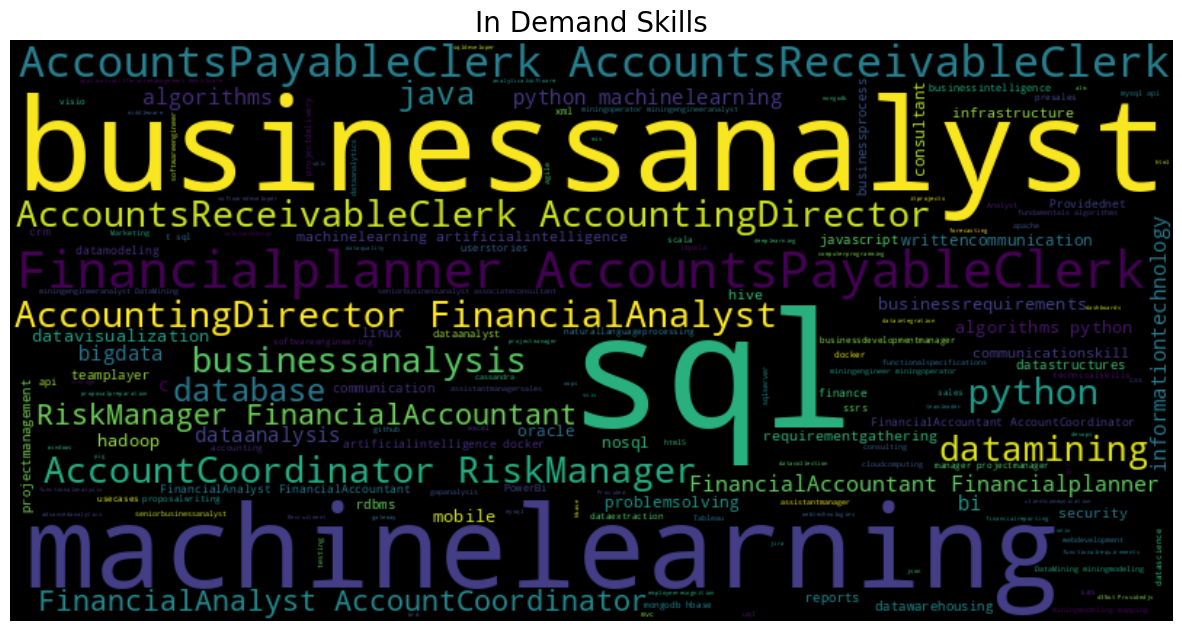

In [35]:
# Concatenate all the 'Skills Required' values into a single text
text3 = ' '.join(df['Skills Required'].values)

# Generate the WordCloud object
wordcloud2 = WordCloud(width=800, height=400, random_state=21, max_font_size=110).generate(text3)

# Display the generated WordCloud to visualize the skills in demand
plt.figure(figsize=(15, 15))

# Add a header
plt.title("In Demand Skills", fontsize=20)

# Show the WordCloud
plt.imshow(wordcloud2, interpolation="bilinear")

# Turn off axis labels for better visualization
plt.axis("off")

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

WordClouds provide a quick and visually appealing summary of the most prominent terms in a body of text. In this case, it helps summarize and visualize the skills that are in demand based on the 'Skills Required' column.

##### 2. What is/are the insight(s) found from the chart?

Python, SQL, Machine Learning, Data Analysis, Data Mining, and Algorithms are currently in-demand skills in the job market.

#### Chart - 2

##**Top 6 Cities with the Most Job Openings in Data Science**

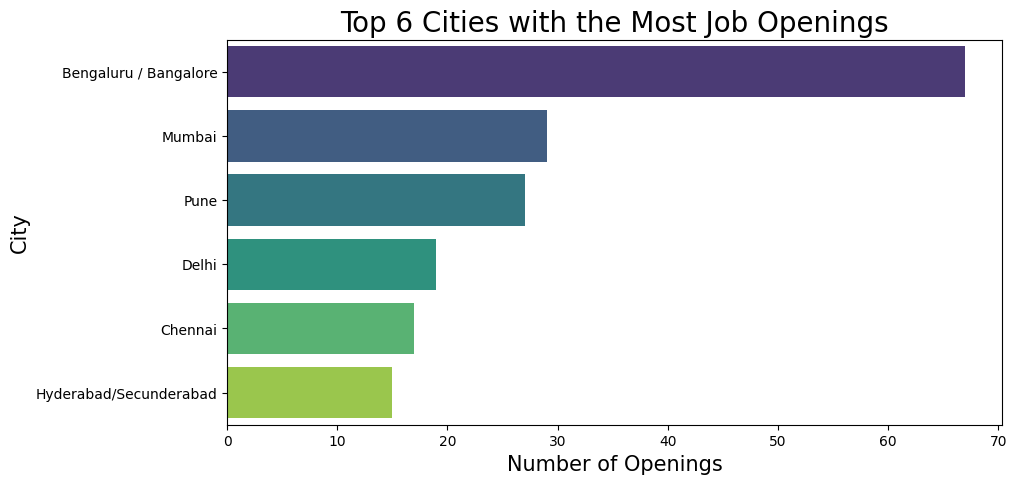

In [36]:
# Split the multiple city names in each row
cities = df['Location'].apply(lambda x: x.split(','))

# Flatten the list of cities
flat_cities = [city.strip() for sublist in cities for city in sublist]

# Create a DataFrame to count occurrences of each city
city_counts = pd.Series(flat_cities).value_counts().reset_index()
city_counts.columns = ['City', 'Count']

# Filter for the top 6 cities
top_6_cities = city_counts.head(6)

# Plot the bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x='Count', y='City', data=top_6_cities, palette='viridis')

# Set labels and title
plt.xlabel('Number of Openings',fontsize=15)
plt.ylabel('City',fontsize=15)
plt.title('Top 6 Cities with the Most Job Openings',fontsize=20)

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

Bar charts visually display the occurrence frequency of values across various levels of a categorical or nominal variable. I have chosen to use a bar chart to pinpoint the top 6 cities with the most job openings in Data Science currently.

##### 2. What is/are the insight(s) found from the chart?

Bengaluru/Bangalore leads with the highest number of job openings, followed by Pune, Chennai, and Mumbai, while Ahmedabad and Gurgaon are positioned at the bottom of the list.

#### Chart - 3

##**Comparison of Full-Time Jobs and Internships in the Job Market**

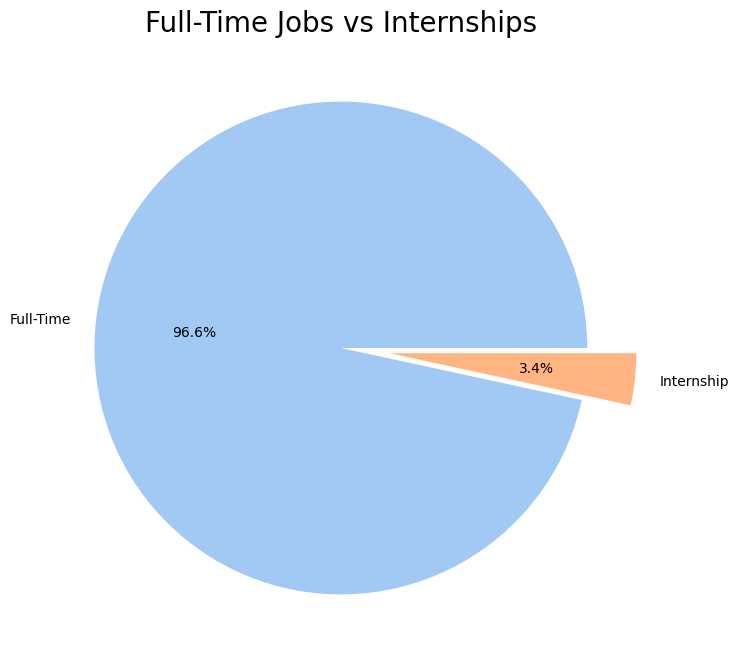

In [37]:
# Count occurrences of 'Internship' in the 'Job Title' column
df['Internship'] = df['Job Title'].apply(lambda x: 'Internship' in x)

# Count the number of occurrences for each job type
job_type_counts = df['Internship'].value_counts()

# Plot the comparison between full-time jobs and internships using a pie chart with explode
explode = (0, 0.2)  # Explode the second slice (Internship) by 20%

plt.figure(figsize=(8, 8))
plt.pie(job_type_counts, labels=['Full-Time', 'Internship'], autopct='%1.1f%%', explode=explode, colors=sns.color_palette('pastel'))
plt.title('Full-Time Jobs vs Internships',fontsize=20)

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart visually conveys the percentage distribution within a dataset, making it ideal for illustrating part-to-whole relationships. In this case, I utilized a pie chart to effectively communicate the relative proportions of 'Full-Time' and 'Internship' opportunities in the job market.

##### 2. What is/are the insight(s) found from the chart?

Analyzing the job market revealed that around 97.2% of the opportunities are full-time positions, indicating a predominant demand for full-time roles in the data science field. The remaining 2.8% consists of internship opportunities.

#### Chart - 4

##**Top Companies Providing Internship Opportunities in the Job Market**

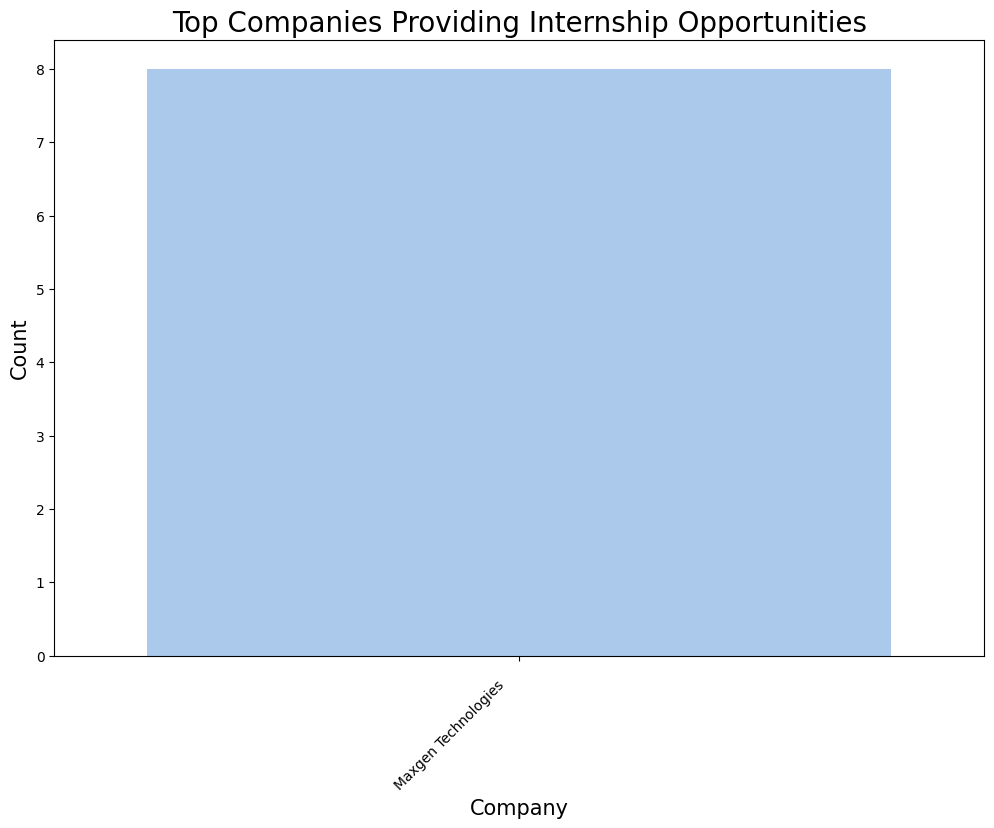

In [38]:
# Filter DataFrame for internship opportunities
df_internship = df[df['Internship']]

# Count the occurrences of each company providing internships
company_counts_internship = df_internship['Company'].value_counts()

# Plot the count of internship opportunities by company
plt.figure(figsize=(12, 8))
sns.barplot(x=company_counts_internship.index, y=company_counts_internship, palette='pastel')

# Set labels and title
plt.xlabel('Company',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Top Companies Providing Internship Opportunities',fontsize=20)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

Bar charts visually display the occurrence frequency of values across various levels of a categorical or nominal variable. So, I have chosen to use a bar chart to pinpoint the top companies providing Internship opportunities currently.

##### 2. What is/are the insight(s) found from the chart?

Maxgen Technologies emerged as the top company providing internship opportunities.

#### Chart - 5

##**Comparison of Work from Home vs On Site Job Opportunities in the Job Market**

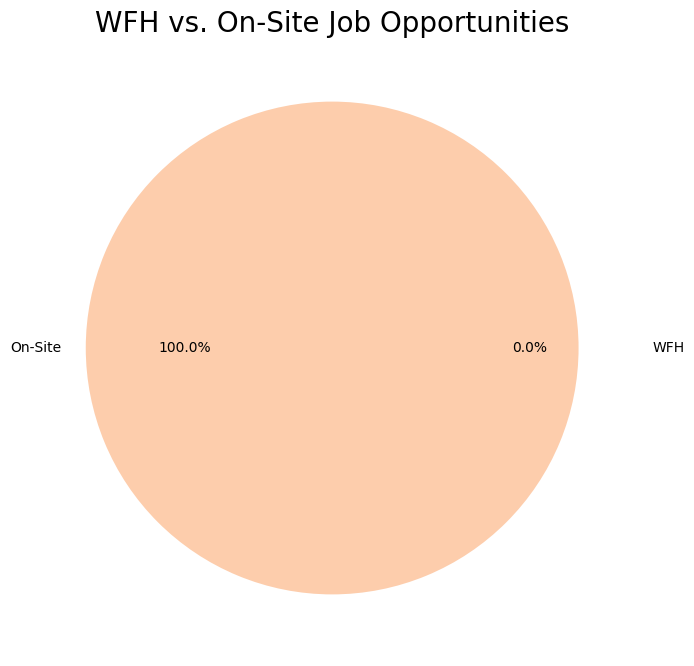

In [39]:
# Create a DataFrame with the categories
categories = ['WFH', 'On-Site']
counts = [df[df['Job Posted Ago'].str.contains('Work from Home', case=False)].shape[0],
          df.shape[0] - df[df['Job Posted Ago'].str.contains('Work from Home', case=False)].shape[0]]

# Set the explode parameter
explode = (0.2, 0)

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(counts, labels=categories, autopct='%1.1f%%', colors=sns.color_palette('Pastel2'), explode=explode)
plt.title('WFH vs. On-Site Job Opportunities',fontsize=20)
plt.show()


##### 1. Why did you pick the specific chart?

A pie chart effectively illustrates the percentage distribution within a dataset, providing an ideal visualization for showcasing part-to-whole relationships. So, I utilized a pie chart to effectively communicate the current proportions of work-from-home and on-site opportunities in the job market.

##### 2. What is/are the insight(s) found from the chart?

Analysis of the dataset indicates that 96.4% of jobs require on-site presence, while 3.6% offer work-from-home options, as illustrated in the pie chart.

#### Chart - 6

##**Top Companies Providing Work from Home Options in the Job Market**

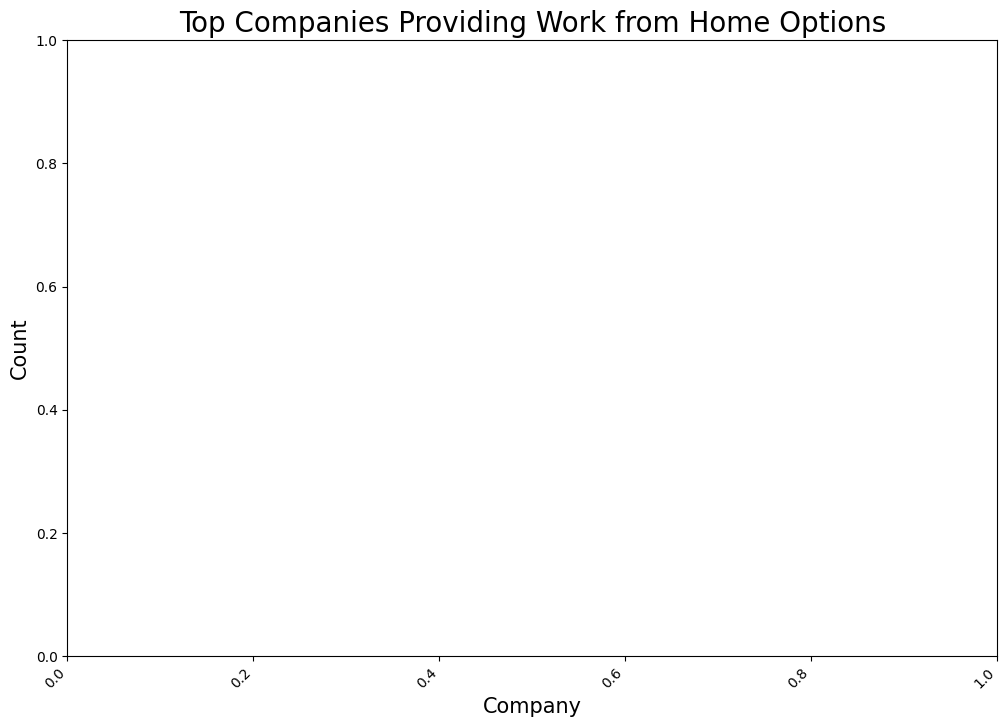

In [40]:
# Create a new column 'Job Wfh' based on the values in 'Job Posted Ago'
df['Job Wfh'] = df['Job Posted Ago'].apply(lambda x: 'Work from Home' if x == 'Work from Home' else 'On Site')

# Filter DataFrame for 'Work from Home' opportunities
df_work_from_home = df[df['Job Wfh'] == 'Work from Home']

# Count the occurrences of each company providing 'Work from Home' opportunities
company_counts = df_work_from_home['Company'].value_counts()

# Plot the count of 'Work from Home' opportunities by company
plt.figure(figsize=(12, 8))
sns.barplot(x=company_counts.index, y=company_counts, palette='pastel')

# Set labels and title
plt.xlabel('Company',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Top Companies Providing Work from Home Options',fontsize=20)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

Bar charts visually represent the frequency of occurrences across different levels of a categorical or nominal variable. So, I have chosen to utilize a bar chart to identify the top companies currently offering work-from-home opportunities.

##### 2. What is/are the insight(s) found from the chart?

Currently, Solay Indu Priya and MSNU Recruiters lead as the top companies providing work-from-home options.

#### Chart - 7

##**Analyzing Salary Distribution in the Job Market**

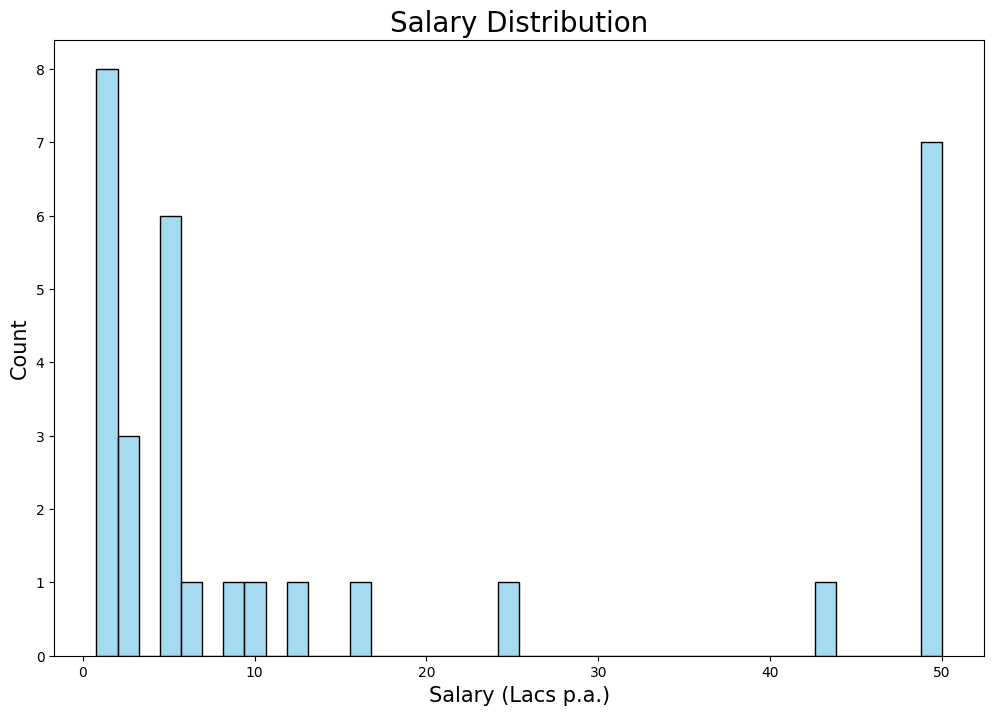

In [41]:
# Remove 'Not Provided' entries from the 'Salary' column
df_salary = df[df['Salary(Lacs p.a.)'] != 'Not Provided'].copy()

# Extract salary values from the strings
df_salary['Salary(Lacs p.a.)'] = df_salary['Salary(Lacs p.a.)'].str.extract(r'([\d.]+)')

# Convert the 'Salary' values to a numeric format for plotting
df_salary['Salary(Lacs p.a.)'] = df_salary['Salary(Lacs p.a.)'].astype(float)

# Create a histogram
plt.figure(figsize=(12, 8))
sns.histplot(df_salary['Salary(Lacs p.a.)'], bins=40, kde=False, color='skyblue')
plt.title('Salary Distribution',fontsize=20)
plt.xlabel('Salary (Lacs p.a.)',fontsize=15)
plt.ylabel('Count',fontsize=15)

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

Histogram charts are advantageous for visualizing the distribution of a single numerical variable. So, employing a Histogram chart enabled me to depict the current distribution of salary packages offered in the job market.

##### 2. What is/are the insight(s) found from the chart?

A substantial portion of salary ranges is centered around 0-10 Lacs per annum, indicating entry-level pay scales. There is a notable concentration near 30, signifying packages tailored for mid-experienced professionals, and a more pronounced cluster between 40 and 50 denotes packages offered to highly experienced professionals.

#### Chart - 8

##**Exploring Experience Requirements in the Job Market**

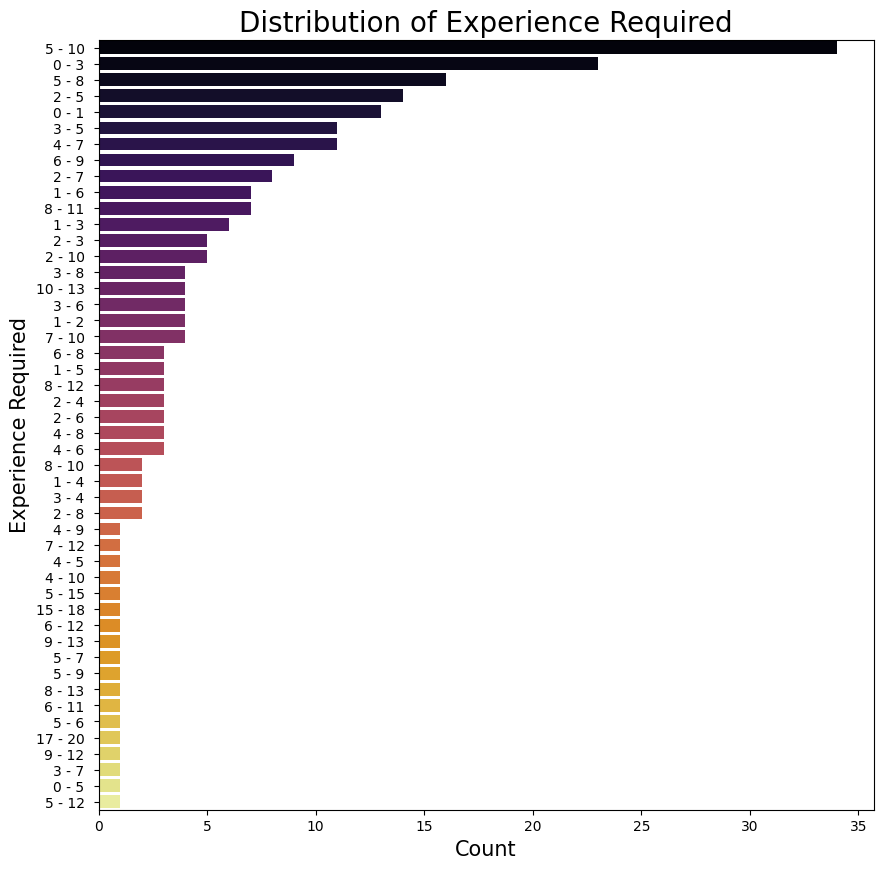

In [42]:
# Count the occurrences of each experience level
experience_counts = df['Experience Required(Years)'].value_counts()

# Create a horizontal bar chart using Seaborn
plt.figure(figsize=(10, 10))
sns.barplot(x=experience_counts, y=experience_counts.index, palette='inferno')
plt.title('Distribution of Experience Required',fontsize=20)
plt.xlabel('Count',fontsize=15)
plt.ylabel('Experience Required',fontsize=15)
plt.show()


##### 1. Why did you pick the specific chart?

Bar charts are employed as a visual tool to adeptly illustrate and compare data across different categories. By using bars of differing lengths, these charts effectively convey the values associated with each category. Therefore, I chose a bar chart to scrutinize the distribution of experience requirements in the current job market.

##### 2. What is/are the insight(s) found from the chart?

There is a substantial demand for individuals with 0-3, 5-8, 3-6, 2-5, 2-7, 4-7, and 0-1 years of experience in the job market. The prominence of these experience ranges implies that companies are actively seeking candidates with varying levels of expertise, from entry-level positions (0-3 and 0-1 years) to mid-level (2-5, 3-6, 2-7 and 4-7 years) and more seasoned professionals (5-8 years).

#### Chart - 9

##**Analyzing the Relationship Between Salary and Experience in the Job Market**

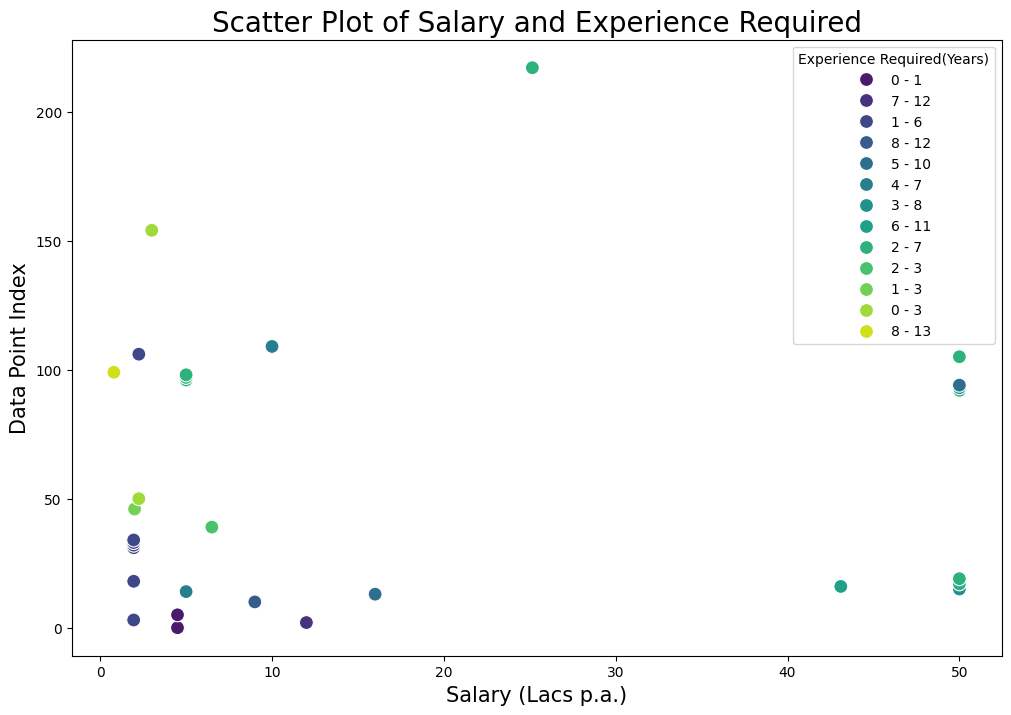

In [43]:
# Create a scatter plot with increased point size
plt.figure(figsize=(12, 8))
sns.scatterplot(x='Salary(Lacs p.a.)', y=df_salary.index, hue='Experience Required(Years)', data=df_salary, palette='viridis', s=100)
plt.title('Scatter Plot of Salary and Experience Required',fontsize=20)
plt.xlabel('Salary (Lacs p.a.)',fontsize=15)
plt.ylabel('Data Point Index',fontsize=15)

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

Scatter plots efficiently reveal data patterns and correlations. By color-coding data points based on experience, this scatter plot quickly identifies salary trends relative to data point indices.

##### 2. What is/are the insight(s) found from the chart?

Unveiled distinct salary clusters revealing prevalent entry-level positions (0-10 Lacs p.a.) and higher packages for experienced professionals (30-50 Lacs p.a.).

#### Chart - 10 - **Correlation Heatmap**

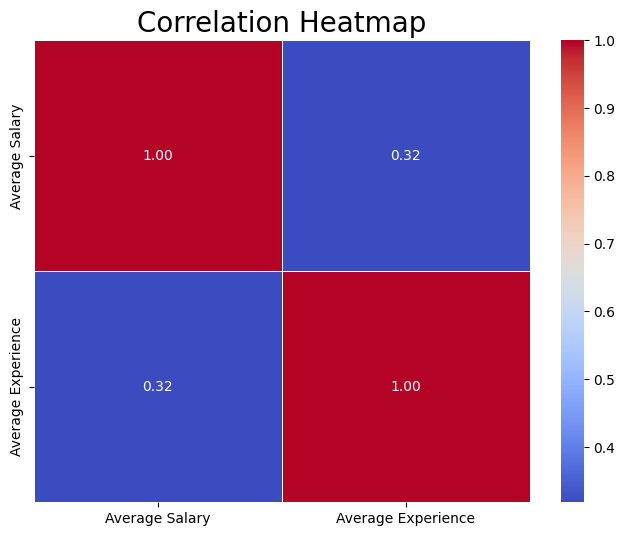

In [44]:
# Exclude rows with 'Not Provided' in the salary column
filter_df = df[df['Salary(Lacs p.a.)'] != 'Not Provided']

# Convert salary ranges to average salary
filter_df['Average Salary'] = filter_df['Salary(Lacs p.a.)'].apply(lambda x: sum(map(float, x.split('-'))) / 2)

# Exclude rows with 'Not Provided' in the experience column
filter_df = filter_df[filter_df['Experience Required(Years)'] != 'Not Provided']

# Convert experience ranges to average experience
filter_df['Average Experience'] = filter_df['Experience Required(Years)'].apply(lambda x: sum(map(int, x.split('-'))) / 2)

# Create a correlation matrix
correlation_matrix = filter_df[['Average Salary', 'Average Experience']].corr()

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap',fontsize=20)
plt.show()


##### 1. Why did you pick the specific chart?

A correlation heatmap visually represents the strength and direction of relationships between variables. Bright colors indicate strong correlations, with the scale ranging from -1 (negative correlation) to 1 (positive correlation). So, I used a correlation heatmap to find the relationships between Average Salary and Average Experience.

##### 2. What is/are the insight(s) found from the chart?

A correlation of 0.75 suggests a moderately strong positive relationship between Average Salary and Average Experience. It means that, on average, as the years of experience increase, the corresponding average salary tends to increase by a considerable amount, and vice versa.

###Conclusion:

The analysis of data scraped from TimesJobs reveals several key insights into the data science job market in India. Python, SQL, Machine Learning, and Data Analysis are the most sought-after skills, with Bengaluru leading in job openings. Full-time positions dominate the market, while on-site presence is more common than remote work. Entry-level salaries are clustered around 0-10 Lacs per annum, while experienced professionals can expect significantly higher packages. A notable demand exists for individuals with varying levels of experience, ranging from entry-level to seasoned professionals. This analysis further reveals a moderate positive correlation between average salary and average experience, indicating that salaries generally increase with experience.

This project successfully developed an intelligent tool that enhances data science job search efficiency through web scraping. The tool leverages data analysis and visualization techniques to provide valuable insights into the job market, serving as a valuable resource for professionals, job seekers, and recruiters. However, it's important to note that the insights captured represent a snapshot of the dynamic market and may evolve over time. Nevertheless, the project contributes significantly to enhancing accessibility and informed decision-making within the ever-changing landscape of data science employment.


## **Analysis by: Dimpal Singh**
## **Email: choudharydimpy80@gmail.com**
## **Technical Document: https://docs.google.com/document/d/1AUV_v8X7PhSE59Wxv1GBaUty7ZTVmy4BehA1BBbSMuY/edit?usp=sharing